# Análise exploratória das notas dos filmes

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
notas = pd.read_csv("dados/ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
filmes = pd.read_csv("dados/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]

In [3]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Análise de notas por gênero

In [5]:
generos_de_filmes = filmes.generos
generos_de_filmes.drop_duplicates(inplace=True)
generos = set()
for genero in generos_de_filmes.values:
    for aux in genero.split("|"):
        generos.add(aux)
generos_de_filmes = pd.Series(list(generos))
generos_de_filmes

0                Fantasy
1            Documentary
2                  Drama
3                  Crime
4                Romance
5               Thriller
6              Adventure
7               Children
8                   IMAX
9                Mystery
10    (no genres listed)
11                Action
12                Sci-Fi
13                   War
14               Western
15               Musical
16             Film-Noir
17                Comedy
18             Animation
19                Horror
dtype: object

In [88]:
dados = {}
for genero in generos_de_filmes.values:
    dados[genero] = []
    filmes_selecionados = filmes[filmes["generos"].str.contains(genero, na=False)]
    for selecionado in filmes_selecionados.filmeId.values:
        dados[genero].extend(notas.query(f"filmeId == {selecionado}").nota.values)

In [145]:

for key, value in dados.items():
    dados[key] = pd.Series(value)

medias = {key: value.mean() for key, value in dados.items()}
medias = pd.DataFrame.from_dict(medias, orient='index', columns=['media'])
medianas = {key: value.median() for key, value in dados.items()}
medianas = pd.DataFrame.from_dict(medianas, orient='index', columns=['mediana'])
desvio_padrao = {key: value.std() for key, value in dados.items()}
desvio_padrao = pd.DataFrame.from_dict(desvio_padrao, orient='index', columns=['desvio'])

In [201]:
generos_ = list(medias.index)
medias_ = [v[0] for v in medias.values]
medianas_ = [v[0] for v in medianas.values]
desvio_padrao_ = [v[0] for v in desvio_padrao.values]

## Médias das notas por gênero

<BarContainer object of 20 artists>

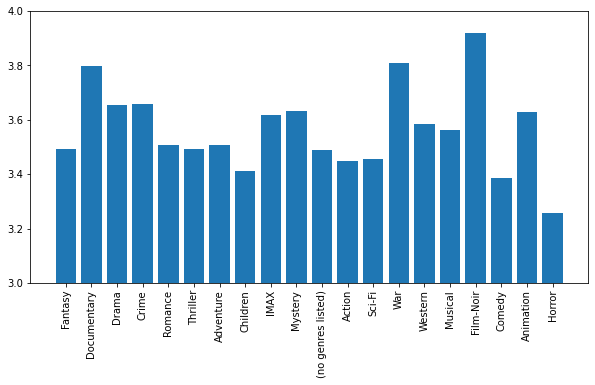

In [200]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
low = min(medias_)
high = max(medias_)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high-0.5*(high-low))])
plt.bar(generos_, medias_)

## Mediana das notas por gênero

<BarContainer object of 20 artists>

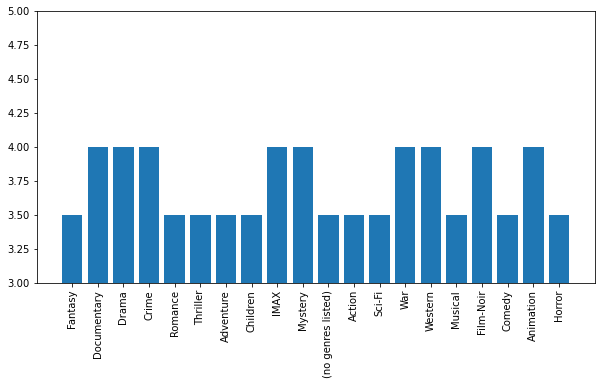

In [226]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
low = min(medianas_)
high = max(medianas_)
plt.ylim(3, 5)
plt.bar(generos_, medianas_)

## Desvio padrão das notas por gênero

<BarContainer object of 20 artists>

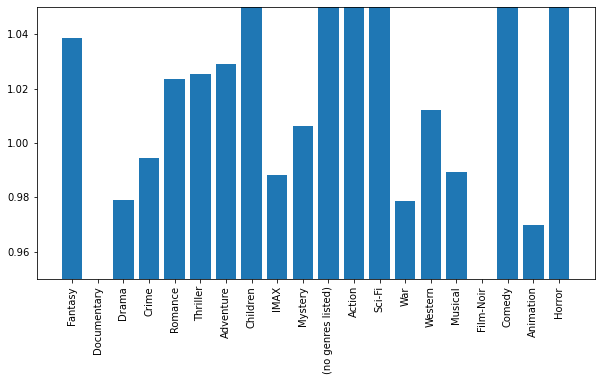

In [217]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
low = min(desvio_padrao_)
high = max(desvio_padrao_)
plt.ylim([math.ceil(low*(high-low)), math.ceil(high*(high-low))])
plt.bar(generos_, desvio_padrao_)